## This is the translation and testing of previously written R functions
They will be:
### 1 genMA, a Robust function that generates Moving Average
### 2 Price projectiion, using linear, cubic, and quadratic regression for future price predictions



In [2]:
import pandas as pd
import csv
import plotly
#import plotly.graph_obcalled_listects as go
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import unittest

In [3]:
#All dataframes are on the candle distribution unless otherwise stated. 
cu_df = pd.read_csv("Relevant Data/copper.csv")
#copper
au_df = pd.read_csv("Relevant Data/gold.csv")
#gold
ag_df = pd.read_csv("Relevant Data/silver.csv")
#silver
oil_df = pd.read_csv("Relevant Data/oil.csv")
ti_ppi_df = pd.read_csv("Relevant Data/Ti_PPI.csv")
ti_ppi_df = ti_ppi_df.reset_index(names=['new_index'])
#Titanium PPI (A monthly metric)


In [6]:
print(oil_df.columns)
print(oil_df.shape[0])

Index(['time', 'open', 'high', 'low', 'close'], dtype='str')
894


## Rewriting this function using coding guidelines of 5 lines max
1. Generate Index List - What I want is actually a list of lists with each list referenceing the index we need to calculate the averages. What is actually i, called_list, and k? How might I better describe these variables to make the function more intuitively make sense? I can stand for outer_list because it will serve as a reference to each indivdiual lists. called_list can stand for "called_list" because we need to call it using an index for the mean calculations. 
2. Call Index List for mean calculations - Call a list from the list of lists and reference price matrix for average
3. Use the two functions and return a list of the calculated averages

What I learned: append works if you have a list of multiple element. 

In [15]:
def generate_index(df, moving_average_length):
    ma_index = range(moving_average_length)
    ma_index_list = []
    df_length_index = range(df.shape[0])
    for outer_index in df_length_index:  
        values_from_index = []
        for called_list in ma_index:
            #values_from_index.append([range(outer_index,abs(called_list - outer_index))])
            values_from_index.append(abs(called_list - outer_index))
        ma_index_list.append(values_from_index)
    return(ma_index_list)

#sample_lol = generate_index(oil_df, 5)

#Test if there are negative values
negative_values_test_input = generate_index(oil_df, 5)

class neg_values (unittest.TestCase):
    def neg_values_test(self):
        negative_values_test_input = generate_index(oil_df, 5)
        flattened_list = [item for sublist in negative_values_test_input for item in sublist]
        flattened_list_index = range(len(flattened_list))
        for values in flattened_list_index:
            if flattened_list[values] < 0:
                return False
        return True
            


#Test to make sure that all the numbers are actual index values, they should be an interger...

def calc_mean_from_index(df, moving_average_length):
    reference_list_of_lists = generate_index(df, moving_average_length)
    rolling_price = (df['open'] + df['close'])/2
    df_length_index = range(df.shape[0])
    list_of_means = []
    for generated_means in df_length_index:
        list_of_means.append(np.round((np.mean(rolling_price[reference_list_of_lists[generated_means]])),2))
    return(list_of_means)
        
        
#Test for same nummber of elements in the dataframe as what originally comes in

#sample_returned = calc_mean_from_index(oil_df, 5)
#print(sample_returned)
    



In [16]:
class neg_values (unittest.TestCase):
    def neg_values_test(self):
        negative_values_test_input = generate_index(oil_df, 5)
        flattened_list = [item for sublist in negative_values_test_input for item in sublist]
        flattened_list_index = range(len(flattened_list))
        for values in flattened_list_index:
            if flattened_list[values] < 0:
                return False
        return True

In [14]:
sample_lol = generate_index(oil_df, 5)
flattened_list = [item for sublist in sample_lol for item in sublist]

print(len(flattened_list))

4470


In [22]:
#Test without unit_test
negative_values_test_input = generate_index(oil_df, 5)
flattened_list = [item for sublist in negative_values_test_input for item in sublist]
flattened_list_index = range(len(flattened_list))



def neg_values_test(list_of_values):
    for values in flattened_list_index:
        if flattened_list[values] < 0:
            print("Negative Value detected")
            break
    print("Test has Passed")

neg_values_test(flattened_list)

neg_values_test([3,-5,2,5])


Test has Passed
Test has Passed


In [27]:
if 5 > 3:
    print("5 is bigger than 3")
else:
    print("False statement")



5 is bigger than 3


## Mixed Regression prediction
This is where I try to incorporate linear, qudratic, and cubic regression into a price prediction for Titanium PPI based on solely Titanium PPI data.
Also, we will try assigning them different weights in perhaps a random forest or a neural net to see how it would do purely based on itself. 
1. Learn the regression methods in Python- Using closing price
2. Graph results
3. Feed the regression results (after 7 perhaps- as that helps show statistic significance) into ML model
4. 

,new_index,time,close
0,0,1971-01-01,27.2
1,1,1971-02-01,27.3
2,2,1971-03-01,27.6
3,3,1971-04-01,28.2
4,4,1971-05-01,28.2
...,...,...,...
655,655,2025-08-01,233.4
656,656,2025-09-01,233.4
657,657,2025-10-01,233.8
658,658,2025-11-01,234.0


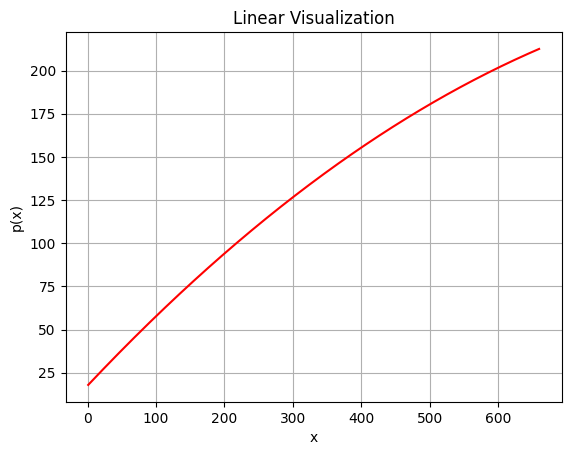

In [24]:
display(ti_ppi_df)

linear_ti_ppi = np.polyfit(ti_ppi_df['new_index'], ti_ppi_df['close'], 2)
quadratic_ti_ppi = np.polyfit(ti_ppi_df['new_index'], ti_ppi_df['close'], 3)
cubic_ti_ppi = np.polyfit(ti_ppi_df['new_index'], ti_ppi_df['close'], 4)

linear_ti_ppi_poly = np.poly1d(linear_ti_ppi)
quadratic_ti_ppi_poly = np.poly1d(quadratic_ti_ppi)
cubic_ti_ppi_poly = np.poly1d(cubic_ti_ppi)

# 2. Generate a smooth range of x-values
linear_ti_ppi_poly_x = np.linspace(1, ti_ppi_df.shape[0], 500)

# 3. Calculate the corresponding y-values
linear_ti_ppi_poly_y = linear_ti_ppi_poly(linear_ti_ppi_poly_x)

# 4. Plot the polynomial
plt.plot(linear_ti_ppi_poly_x, linear_ti_ppi_poly_y, color='red')
plt.title('Linear Visualization')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.show()


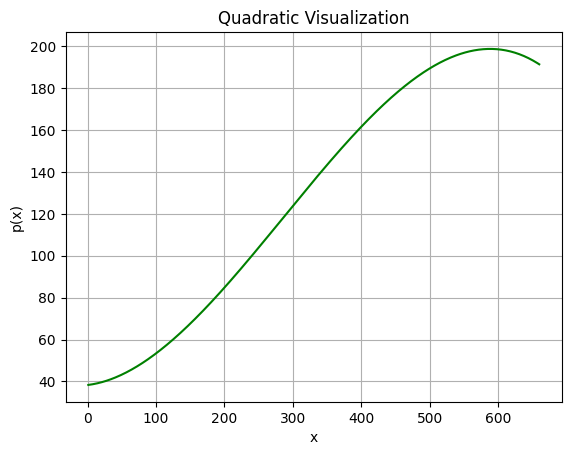

In [26]:
quadratic_ti_ppi_poly_x = np.linspace(1, ti_ppi_df.shape[0], 500)

# 3. Calculate the corresponding y-values
quadratic_ti_ppi_poly_y = quadratic_ti_ppi_poly(quadratic_ti_ppi_poly_x)

# 4. Plot the polynomial
plt.plot(quadratic_ti_ppi_poly_x, quadratic_ti_ppi_poly_y, color='green')
plt.title('Quadratic Visualization')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.show()


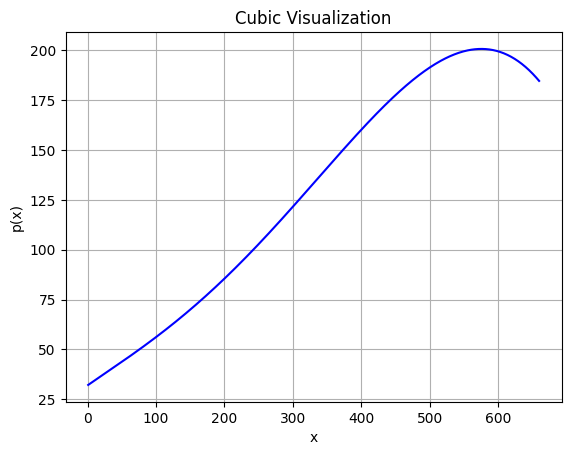

In [27]:
cubic_ti_ppi_poly_x = np.linspace(1, ti_ppi_df.shape[0], 500)

# 3. Calculate the corresponding y-values
cubic_ti_ppi_poly_y = cubic_ti_ppi_poly(cubic_ti_ppi_poly_x)

# 4. Plot the polynomial
plt.plot(cubic_ti_ppi_poly_x, cubic_ti_ppi_poly_y, color='blue')
plt.title('Cubic Visualization')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.show()


# We have input values...
Now that we have values/equations from our various regressions, which ML methods should we feed the p(x) "predictors"? 